** ** 

<figure>
<div style="text-align:center"><img src="./img/temp_circ.png" /></div>
<p><center>Detail of the experimental setup.</center></p>
</figure>

# Calibration (Graphical Method)

** **

* This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Import the libraries

In [1]:
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas as pd

## Load and plot the data

* The points that define the calibration curve were extracted from the printed version of the curve included with the Lake Shore manual. 

* Presumably the intended method of estimating the temperature involved using a pencil and ruler on the printed diagram.

* To make it easier to convert the measured resistance values to temperature values I replicated the curve here such that it can be reused for subsequent measurements. 

* Using the factory calibration curve is not the most accurate method of measuring the instrument response but certain assumptions can be made about the accuracy based on the age of the instruments.

In [2]:
data = pd.read_csv('./Data/Lake_Shore_xy.csv', sep = " ", header = None)

data.head()

,0,1
0,1.1,100000.0
1,2.0,9500.0
2,3.0,3000.0
3,5.0,1000.0
4,6.0,700.0


In [3]:
data.rename(columns={0: "Temperature", 1: "Resistance"}, inplace=True)

data.head()

,Temperature,Resistance
0,1.1,100000.0
1,2.0,9500.0
2,3.0,3000.0
3,5.0,1000.0
4,6.0,700.0


In [4]:
#assign the columns to variables 
x = data["Temperature"]
y = data["Resistance"]

## Plot the data

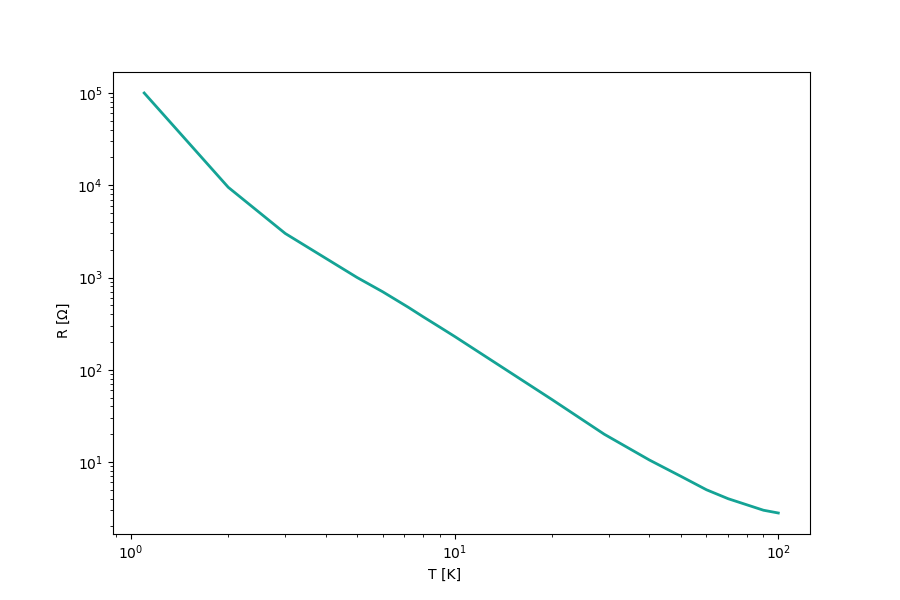

In [5]:
#Uncomment the line below to make the graph interactive
%matplotlib widget

#Set the figure size
plt.figure(figsize=(9,6))

#Plot the calibration curve
plt.plot(x, y, '#14a395', linewidth=2)
plt.ylabel(r'R [$\Omega$]', ha='right')
plt.xlabel(r'T [K]', ha='right')

plt.xscale("log")
plt.yscale("log")

#Show the plot
plt.show()

## Visualize the estimated values

* The temperature values were estimated by drawing straight lines from each measured resistance value on the y-axis to the calibration curve using the graphical user interface of root (CERN) and then finding the corresponding temperature value on the x-axis using a vertical line.

* The same result can be achieved by visually estimating the x, y pairs using the graph above in the interactive mode. 

* **In the following notebook I show a method of replicating the process by using a calibration function as an estimator.** 

* Both methods are techniques of reverse engineering the factory calibration curve which only offers the means for converting resistance to temperature. 

* True calibration would require a calibrator which was not available for this experiment. 

* As such, instrument drifting should definitely be taken into account when estimating possible sources of errors. 

In [17]:
# Group the graphically estimated points and lines using lists
points_and_lines = [
    ([10.504, 0], [10.504, 207]),
    ([4.354, 0], [4.354, 1313]),
    ([0, 207], [10.504, 207]),
    ([0, 1313], [4.354, 1313]),
    ([8.630, 0], [8.630, 312]),
    ([7.767, 0], [7.767, 402]),
    ([7.141, 0], [7.141, 481]),
    ([6.634, 0], [6.634, 555]),
    ([6.338, 0], [6.338, 620]),
    ([6.013, 0], [6.013, 687]),
    ([5.765, 0], [5.765, 757]),
    ([5.489, 0], [5.489, 857]),
    ([5.171, 0], [5.171, 937]),
    ([4.923, 0], [4.923, 1030]),
    ([4.889, 0], [4.889, 1045]),
    ([4.804, 0], [4.804, 1085]),
    ([4.720, 0], [4.720, 1116]),
    ([4.655, 0], [4.655, 1152]),
    ([4.622, 0], [4.622, 1169]),
    ([4.557, 0], [4.557, 1184]),
    ([4.478, 0], [4.478, 1198]),
    ([4.447, 0], [4.447, 1220]),
    ([4.416, 0], [4.416, 1244]),
    ([4.400, 0], [4.400, 1263]),
    ([4.370, 0], [4.370, 1303]),
    ([0, 312], [8.630, 312]),
    ([0, 402], [7.767, 402]),
    ([0, 481], [7.141, 481]),
    ([0, 555], [6.634, 555]),
    ([0, 620], [6.338, 620]),
    ([0, 687], [6.013, 687]),
    ([0, 757], [5.765, 757]),
    ([0, 857], [5.489, 857]),
    ([0, 937], [5.171, 937]),
    ([0, 1030], [4.923, 1030]),
    ([0, 1045], [4.889, 1045]),
    ([0, 1085], [4.804, 1085]),
    ([0, 1116], [4.720, 1116]),
    ([0, 1152], [4.655, 1152]),
    ([0, 1169], [4.622, 1169]),
    ([0, 1184], [4.557, 1184]),
    ([0, 1198], [4.478, 1198]),
    ([0, 1220], [4.447, 1220]),
    ([0, 1244], [4.416, 1244]),
    ([0, 1263], [4.400, 1263]),
    ([0, 1303], [4.370, 1303])
]

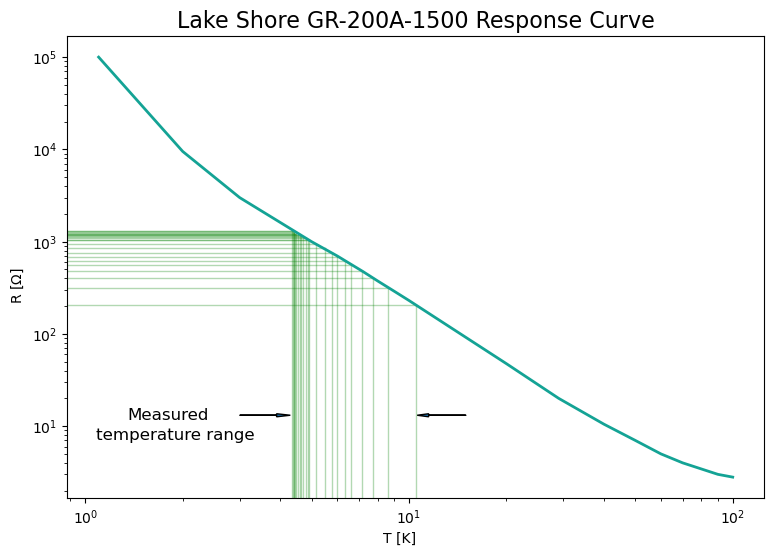

In [19]:
#Set the figure size
plt.figure(figsize=(9,6))

# Loop through the list and create line plots
for p1, p2 in points_and_lines:
    x_line = [p1[0], p2[0]]
    y_line = [p1[1], p2[1]]
    plt.plot(x_line, y_line, 'green', alpha=0.3, linewidth=1)

# Plot the calibration curve    
plt.plot(x, y, '#14a395', linewidth=2)
plt.ylabel(r'R [$\Omega$]', ha='right')
plt.xlabel(r'T [K]', ha='right')

# Make annotations
plt.arrow(3, 13.12, 0.9, 0, head_width=1, head_length=0.4)
plt.arrow(15, 13.12, -3.5, 0, head_width=1, head_length=0.9)
plt.text(1.8, 13, r'Measured', fontsize=12, horizontalalignment='center', verticalalignment='center')
plt.text(1.9, 8, r'temperature range', fontsize=12, horizontalalignment='center', verticalalignment='center')
plt.title(r'Lake Shore GR-200A-1500 Response Curve', fontsize=16)

plt.xscale("log")
plt.yscale("log")

#Show the plot
plt.show()

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>